In [1]:
import pysal as ps
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
f = ps.open("data/usjoin.csv",'r')

To determine what is in the file, check the `header` attribute on the file object:

In [3]:
f.header

['Name',
 'STATE_FIPS',
 '1929',
 '1930',
 '1931',
 '1932',
 '1933',
 '1934',
 '1935',
 '1936',
 '1937',
 '1938',
 '1939',
 '1940',
 '1941',
 '1942',
 '1943',
 '1944',
 '1945',
 '1946',
 '1947',
 '1948',
 '1949',
 '1950',
 '1951',
 '1952',
 '1953',
 '1954',
 '1955',
 '1956',
 '1957',
 '1958',
 '1959',
 '1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009']

Ok, lets pull in the name variable to see what we have

In [4]:
name = f.by_col('Name')

In [5]:
name

['Alabama',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Minnesota',
 'Mississippi',
 'Missouri',
 'Montana',
 'Nebraska',
 'Nevada',
 'New Hampshire',
 'New Jersey',
 'New Mexico',
 'New York',
 'North Carolina',
 'North Dakota',
 'Ohio',
 'Oklahoma',
 'Oregon',
 'Pennsylvania',
 'Rhode Island',
 'South Carolina',
 'South Dakota',
 'Tennessee',
 'Texas',
 'Utah',
 'Vermont',
 'Virginia',
 'Washington',
 'West Virginia',
 'Wisconsin',
 'Wyoming']

Now obtain per capital incomes in 1929 which is in the column associated with `1929`

In [6]:
y1929 = f.by_col('1929')

In [7]:
y1929

[323,
 600,
 310,
 991,
 634,
 1024,
 1032,
 518,
 347,
 507,
 948,
 607,
 581,
 532,
 393,
 414,
 601,
 768,
 906,
 790,
 599,
 286,
 621,
 592,
 596,
 868,
 686,
 918,
 410,
 1152,
 332,
 382,
 771,
 455,
 668,
 772,
 874,
 271,
 426,
 378,
 479,
 551,
 634,
 434,
 741,
 460,
 673,
 675]

And now 2009

In [8]:
y2009 = f.by_col("2009")

In [9]:
y2009

[32274,
 32077,
 31493,
 40902,
 40093,
 52736,
 40135,
 36565,
 33086,
 30987,
 40933,
 33174,
 35983,
 37036,
 31250,
 35151,
 35268,
 47159,
 49590,
 34280,
 40920,
 29318,
 35106,
 32699,
 37057,
 38009,
 41882,
 48123,
 32197,
 46844,
 33564,
 38672,
 35018,
 33708,
 35210,
 38827,
 41283,
 30835,
 36499,
 33512,
 35674,
 30107,
 36752,
 43211,
 40619,
 31843,
 35676,
 42504]

These are read into regular Python lists which are not particularly well suited to efficient data analysis. So let's convert them to numpy arrays

In [10]:
y2009 = np.array(y2009)

In [11]:
y2009

array([32274, 32077, 31493, 40902, 40093, 52736, 40135, 36565, 33086,
       30987, 40933, 33174, 35983, 37036, 31250, 35151, 35268, 47159,
       49590, 34280, 40920, 29318, 35106, 32699, 37057, 38009, 41882,
       48123, 32197, 46844, 33564, 38672, 35018, 33708, 35210, 38827,
       41283, 30835, 36499, 33512, 35674, 30107, 36752, 43211, 40619,
       31843, 35676, 42504])

Much better. But pulling these in and converting them a column at a time is tedious and error prone. So we will do all of this in a list comprehension.

In [12]:
Y = np.array( [ f.by_col(str(year)) for year in range(1929,2010) ] ) * 1.0

In [13]:
Y.shape

(81, 48)

In [14]:
Y = Y.transpose()

In [15]:
Y.shape

(48, 81)

In [16]:
years = np.arange(1929,2010)

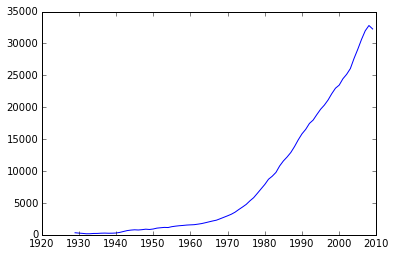

In [17]:
plot(years,Y[0])

In [18]:
RY = Y / Y.mean(axis=0)

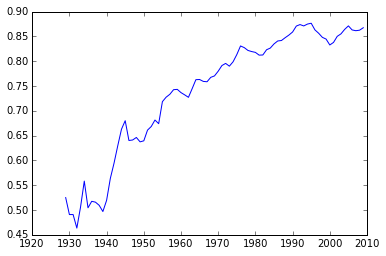

In [19]:
plot(years,RY[0])

In [20]:
name = np.array(name)

In [21]:
np.nonzero(name=='Ohio')

(array([32]),)

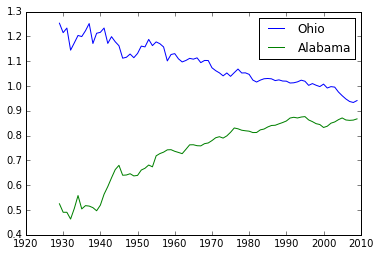

In [22]:
plot(years, RY[32], label='Ohio')
plot(years, RY[0], label='Alabama')
legend()

# Kernel Density (univariate, aspatial)

In [23]:
from scipy.stats.kde import gaussian_kde

In [24]:
density = gaussian_kde(Y[:,0])

In [25]:
Y[:,0]

array([  323.,   600.,   310.,   991.,   634.,  1024.,  1032.,   518.,
         347.,   507.,   948.,   607.,   581.,   532.,   393.,   414.,
         601.,   768.,   906.,   790.,   599.,   286.,   621.,   592.,
         596.,   868.,   686.,   918.,   410.,  1152.,   332.,   382.,
         771.,   455.,   668.,   772.,   874.,   271.,   426.,   378.,
         479.,   551.,   634.,   434.,   741.,   460.,   673.,   675.])

In [26]:
density = gaussian_kde(Y[:,0])

In [27]:
minY0 = Y[:,0].min()*.90
maxY0 = Y[:,0].max()*1.10
x = np.linspace(minY0, maxY0, 100)

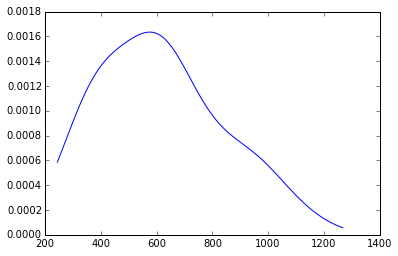

In [28]:
plot(x,density(x))

In [29]:
d2009 = gaussian_kde(Y[:,-1])

In [30]:
minY0 = Y[:,-1].min()*.90
maxY0 = Y[:,-1].max()*1.10
x = np.linspace(minY0, maxY0, 100)

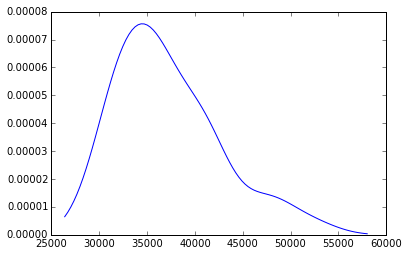

In [31]:
plot(x,d2009(x))

In [32]:
minR0 = RY.min()

In [33]:
maxR0 = RY.max()

In [34]:
x = np.linspace(minR0, maxR0, 100)

In [35]:
d1929 = gaussian_kde(RY[:,0])

In [36]:
d2009 = gaussian_kde(RY[:,-1])

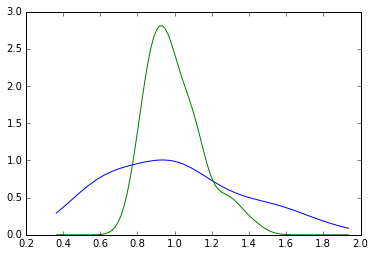

In [37]:
plot(x, d1929(x))
plot(x, d2009(x))

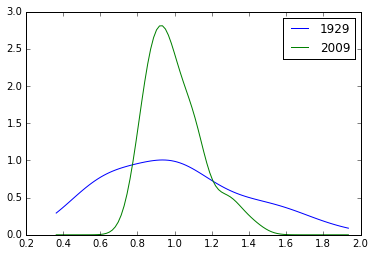

In [38]:
plot(x, d1929(x), label='1929')
plot(x, d2009(x), label='2009')
legend()

## Markov Chains

In [39]:
c = np.array([['b','a','c'],
['c','c','a'],
['c','b','c'],
['a','a','b'],
['a','b','c']])

In [40]:
c

array([['b', 'a', 'c'],
       ['c', 'c', 'a'],
       ['c', 'b', 'c'],
       ['a', 'a', 'b'],
       ['a', 'b', 'c']], 
      dtype='|S1')

In [41]:
m = ps.Markov(c)

In [42]:
m.classes

array(['a', 'b', 'c'], 
      dtype='|S1')

In [43]:
m.transitions

array([[ 1.,  2.,  1.],
       [ 1.,  0.,  2.],
       [ 1.,  1.,  1.]])

In [44]:
m.p

matrix([[ 0.25      ,  0.5       ,  0.25      ],
        [ 0.33333333,  0.        ,  0.66666667],
        [ 0.33333333,  0.33333333,  0.33333333]])

### State Per Capita Incomes

In [45]:
f = ps.open("data/usjoin.csv")
pci = np.array([f.by_col[str(y)] for y in range(1929,2010)])
pci.shape

(81, 48)

Put series into cross-sectional quintiles (i.e., quintiles for each year)

In [46]:
q5 = np.array([ps.Quantiles(y).yb for y in pci]).transpose()

In [47]:
q5.shape

(48, 81)

In [48]:
q5[:,0]

array([0, 2, 0, 4, 2, 4, 4, 1, 0, 1, 4, 2, 2, 1, 0, 1, 2, 3, 4, 4, 2, 0, 2,
       2, 2, 4, 3, 4, 0, 4, 0, 0, 3, 1, 3, 3, 4, 0, 1, 0, 1, 2, 2, 1, 3, 1,
       3, 3])

In [49]:
pci.shape

(81, 48)

In [50]:
pci[0]

array([ 323,  600,  310,  991,  634, 1024, 1032,  518,  347,  507,  948,
        607,  581,  532,  393,  414,  601,  768,  906,  790,  599,  286,
        621,  592,  596,  868,  686,  918,  410, 1152,  332,  382,  771,
        455,  668,  772,  874,  271,  426,  378,  479,  551,  634,  434,
        741,  460,  673,  675])

we are looping over the rows of y which is ordered Txn (rows are cross sections, row 0 is the cross-section for period 0

In [51]:
m5 = ps.Markov(q5)

In [52]:
m5.classes

array([0, 1, 2, 3, 4])

In [53]:
m5.transitions

array([[ 729.,   71.,    1.,    0.,    0.],
       [  72.,  567.,   80.,    3.,    0.],
       [   0.,   81.,  631.,   86.,    2.],
       [   0.,    3.,   86.,  573.,   56.],
       [   0.,    0.,    1.,   57.,  741.]])

In [54]:
m5.p

matrix([[ 0.91011236,  0.0886392 ,  0.00124844,  0.        ,  0.        ],
        [ 0.09972299,  0.78531856,  0.11080332,  0.00415512,  0.        ],
        [ 0.        ,  0.10125   ,  0.78875   ,  0.1075    ,  0.0025    ],
        [ 0.        ,  0.00417827,  0.11977716,  0.79805014,  0.07799443],
        [ 0.        ,  0.        ,  0.00125156,  0.07133917,  0.92740926]])

In [55]:
m5.steady_state

matrix([[ 0.20774716],
        [ 0.18725774],
        [ 0.20740537],
        [ 0.18821787],
        [ 0.20937187]])

In [56]:
fmpt = ps.ergodic.fmpt(m5.p)

In [57]:
fmpt

matrix([[   4.81354357,   11.50292712,   29.60921231,   53.38594954,
          103.59816743],
        [  42.04774505,    5.34023324,   18.74455332,   42.50023268,
           92.71316899],
        [  69.25849753,   27.21075248,    4.82147603,   25.27184624,
           75.43305672],
        [  84.90689329,   42.85914824,   17.18082642,    5.31299186,
           51.60953369],
        [  98.41295543,   56.36521038,   30.66046735,   14.21158356,
            4.77619083]])

For a state with income in the first quintile, it takes on average 11.5 years for it to first enter the second quintile, 29.6 to get to the third quintile, 53.4 years to enter the fourth, and 103.6 years to reach the richest quintile.

## Spatial Markov

In [58]:
pci.shape

(81, 48)

In [59]:
pci = pci.T

In [60]:
pci.shape

(48, 81)

In [61]:
rpci = pci / pci.mean(axis=0)

In [62]:
rpci[:,0]

array([ 0.5250254 ,  0.97527938,  0.50389434,  1.61083644,  1.03054521,
        1.6644768 ,  1.67748053,  0.8419912 ,  0.56403657,  0.82411107,
        1.54094142,  0.98665764,  0.94439553,  0.86474771,  0.63880799,
        0.67294277,  0.97690484,  1.2483576 ,  1.47267186,  1.28411785,
        0.97365391,  0.46488317,  1.00941416,  0.96227565,  0.96877751,
        1.41090417,  1.11506942,  1.49217745,  0.66644091,  1.8725364 ,
        0.53965459,  0.62092787,  1.253234  ,  0.73958686,  1.08581104,
        1.25485946,  1.42065696,  0.44050119,  0.69244836,  0.61442601,
        0.77859804,  0.89563156,  1.03054521,  0.70545208,  1.20447003,
        0.74771419,  1.09393837,  1.0971893 ])

In [63]:
rpci[:,0].mean()

0.99999999999999989

Read in a GAL file to construct our W

In [64]:
w = ps.open(ps.examples.get_path("states48.gal")).read()

In [65]:
w.n

48

In [66]:
w.transform = 'R'

In [67]:
sm = ps.Spatial_Markov(rpci, w, fixed=True, k=5)

In [68]:
sm.p

matrix([[ 0.91461837,  0.07503234,  0.00905563,  0.00129366,  0.        ],
        [ 0.06570302,  0.82654402,  0.10512484,  0.00131406,  0.00131406],
        [ 0.00520833,  0.10286458,  0.79427083,  0.09505208,  0.00260417],
        [ 0.        ,  0.00913838,  0.09399478,  0.84856397,  0.04830287],
        [ 0.        ,  0.        ,  0.        ,  0.06217617,  0.93782383]])

In [69]:
for p in sm.P:
    print p

[[ 0.96341463  0.0304878   0.00609756  0.          0.        ]
 [ 0.06040268  0.83221477  0.10738255  0.          0.        ]
 [ 0.          0.14        0.74        0.12        0.        ]
 [ 0.          0.03571429  0.32142857  0.57142857  0.07142857]
 [ 0.          0.          0.          0.16666667  0.83333333]]
[[ 0.79831933  0.16806723  0.03361345  0.          0.        ]
 [ 0.0754717   0.88207547  0.04245283  0.          0.        ]
 [ 0.00537634  0.06989247  0.8655914   0.05913978  0.        ]
 [ 0.          0.          0.06372549  0.90196078  0.03431373]
 [ 0.          0.          0.          0.19444444  0.80555556]]
[[ 0.84693878  0.15306122  0.          0.          0.        ]
 [ 0.08133971  0.78947368  0.1291866   0.          0.        ]
 [ 0.00518135  0.0984456   0.79274611  0.0984456   0.00518135]
 [ 0.          0.          0.09411765  0.87058824  0.03529412]
 [ 0.          0.          0.          0.10204082  0.89795918]]
[[ 0.8852459   0.09836066  0.          0.01639344  0

In [70]:
sm.S

array([[ 0.43509425,  0.2635327 ,  0.20363044,  0.06841983,  0.02932278],
       [ 0.13391287,  0.33993305,  0.25153036,  0.23343016,  0.04119356],
       [ 0.12124869,  0.21137444,  0.2635101 ,  0.29013417,  0.1137326 ],
       [ 0.0776413 ,  0.19748806,  0.25352636,  0.22480415,  0.24654013],
       [ 0.01776781,  0.19964349,  0.19009833,  0.25524697,  0.3372434 ]])

In [71]:
for f in sm.F:
    print f

[[   2.29835259   28.95614035   46.14285714   80.80952381  279.42857143]
 [  33.86549708    3.79459555   22.57142857   57.23809524  255.85714286]
 [  43.60233918    9.73684211    4.91085714   34.66666667  233.28571429]
 [  46.62865497   12.76315789    6.25714286   14.61564626  198.61904762]
 [  52.62865497   18.76315789   12.25714286    6.           34.1031746 ]]
[[   7.46754205    9.70574606   25.76785714   74.53116883  194.23446197]
 [  27.76691978    2.94175577   24.97142857   73.73474026  193.4380334 ]
 [  53.57477715   28.48447637    3.97566318   48.76331169  168.46660482]
 [  72.03631562   46.94601483   18.46153846    4.28393653  119.70329314]
 [  77.17917276   52.08887197   23.6043956     5.14285714   24.27564033]]
[[   8.24751154    6.53333333   18.38765432   40.70864198  112.76732026]
 [  47.35040872    4.73094099   11.85432099   34.17530864  106.23398693]
 [  69.42288828   24.76666667    3.794921     22.32098765   94.37966594]
 [  83.72288828   39.06666667   14.3           3.

In [72]:
sm.summary()

--------------------------------------------------------------
                     Spatial Markov Test                      
--------------------------------------------------------------
Number of classes: 5
Number of transitions: 3840
Number of regimes: 5
Regime names: LAG0, LAG1, LAG2, LAG3, LAG4
--------------------------------------------------------------
   Test                   LR                Chi-2
  Stat.              170.659              200.624
    DOF                   60                   60
p-value                0.000                0.000
--------------------------------------------------------------
P(H0)           C0         C1         C2         C3         C4
     C0      0.915      0.075      0.009      0.001      0.000
     C1      0.066      0.827      0.105      0.001      0.001
     C2      0.005      0.103      0.794      0.095      0.003
     C3      0.000      0.009      0.094      0.849      0.048
     C4      0.000      0.000      0.000      0.062      

## LISA Markov

In [73]:
lm = ps.LISA_Markov(pci,w)

In [74]:
lm.classes 

array([1, 2, 3, 4])

In [75]:
lm.transitions

array([[  1.08700000e+03,   4.40000000e+01,   4.00000000e+00,
          3.40000000e+01],
       [  4.10000000e+01,   4.70000000e+02,   3.60000000e+01,
          1.00000000e+00],
       [  5.00000000e+00,   3.40000000e+01,   1.42200000e+03,
          3.90000000e+01],
       [  3.00000000e+01,   1.00000000e+00,   4.00000000e+01,
          5.52000000e+02]])

In [76]:
lm.p

matrix([[ 0.92985458,  0.03763901,  0.00342173,  0.02908469],
        [ 0.07481752,  0.85766423,  0.06569343,  0.00182482],
        [ 0.00333333,  0.02266667,  0.948     ,  0.026     ],
        [ 0.04815409,  0.00160514,  0.06420546,  0.88603531]])

In [77]:
lm.steady_state

matrix([[ 0.28561505],
        [ 0.14190226],
        [ 0.40493672],
        [ 0.16754598]])

In [78]:
ps.ergodic.fmpt(lm.p)

matrix([[  3.50121609,  37.93025465,  40.55772829,  43.17412009],
        [ 31.72800152,   7.04710419,  28.68182751,  49.91485137],
        [ 52.44489385,  47.42097495,   2.46952168,  43.75609676],
        [ 38.76794022,  51.51755827,  26.31568558,   5.96851095]])

### Test of independence of own chains and lag chains

In [79]:
lm.transitions

array([[  1.08700000e+03,   4.40000000e+01,   4.00000000e+00,
          3.40000000e+01],
       [  4.10000000e+01,   4.70000000e+02,   3.60000000e+01,
          1.00000000e+00],
       [  5.00000000e+00,   3.40000000e+01,   1.42200000e+03,
          3.90000000e+01],
       [  3.00000000e+01,   1.00000000e+00,   4.00000000e+01,
          5.52000000e+02]])

In [80]:
lm.expected_t

array([[  1.12328098e+03,   1.15377356e+01,   3.47522158e-01,
          3.38337644e+01],
       [  3.50272664e+00,   5.28473882e+02,   1.59178880e+01,
          1.05503814e-01],
       [  1.53878082e-01,   2.32163556e+01,   1.46690710e+03,
          9.72266513e+00],
       [  9.60775143e+00,   9.86856346e-02,   6.23537392e+00,
          6.07058189e+02]])

In [81]:
lm.chi_2

(162.47505958346292, 0.0, 9)